<a href="https://colab.research.google.com/github/raissulaiman/Data-Science-in-Marketing-Customer-Segmentation-with-Python-/blob/main/Data_Science_in_Marketing_Customer_Segmentation_with_Python_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. LATAR BELAKANG**

Perusahaan sedang berusaha untuk mengenal lebih baik pelanggannya. Tujuannya agar perusahaan dapat membuat strategi pemasaran yang lebih tepat dan juga efisien bagi tiap-tiap pelanggan.

Salah satu teknik yang bisa dilakukan untuk menyelesaikan masalah ini adalah dengan melakukan segmentasi pelanggan. Yaitu dengan mengelompokkan pelanggan-pelanggan yang ada berdasarkan kesamaan karakter dari pelanggan tersebut. Segmentasi merupakan salah satu teknik **unsupervised machine learning**.

Salah satunya teknik yang dapat digunakan adalah pengaplikasian ini dengan menggunakan algoritma **K-Prototypes**. Algoritma K-Prototypes merupakan gabungan dari K-Means dan juga K-Modes yang dapat di gunakan untuk melakukan segmentasi dengan data.

## **Data**
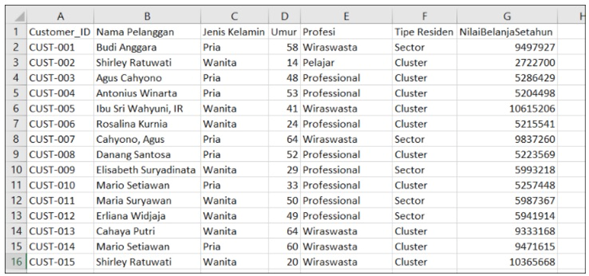

Data yang digunakan memiliki tujuh kolom dengan penjelasan sebagai berikut:

**Customer ID**: Kode pelanggan dengan format campuran teks CUST- diikuti angka

**Nama Pelanggan**: Nama dari pelanggan dengan format teks tentunya

**Jenis Kelamin**: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita

**Umur**: Umur dari pelanggan dalam format angka

**Profesi**: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.

**Tipe Residen**: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.

**Nilai Belanja Setahun**: Merupakan total belanja yang sudah di keluarkan oleh pelanggan tersebut.

# **2. MEMBACA DATA**

Langkah pertama adalah mengimpor data dengan menggunakan library pandas dan menampilkan informasi data dengan `info()`

Diketahui bahwa data terdiri dari 7 kolom dan 50 baris yang dimana tidak ada data yang null. 

In [1]:
import pandas as pd

# import dataset  
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")  
  
# menampilkan data  
print(df.head())

  Customer_ID       Nama Pelanggan  ... Tipe Residen  NilaiBelanjaSetahun
0    CUST-001         Budi Anggara  ...       Sector              9497927
1    CUST-002     Shirley Ratuwati  ...      Cluster              2722700
2    CUST-003         Agus Cahyono  ...      Cluster              5286429
3    CUST-004     Antonius Winarta  ...      Cluster              5204498
4    CUST-005  Ibu Sri Wahyuni, IR  ...      Cluster             10615206

[5 rows x 7 columns]


In [2]:
# Menampilkan informasi data  
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


# **3**. **STATISTIKA DESKRIPTIF** 
Kemudian langkah selanjutnya melakukan data eksplorasi dengan statistika deskriptif. Terdapat dua jenis data di dataframe ini, data numerical dan data kategorikal. 



# **Data Numerical** 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

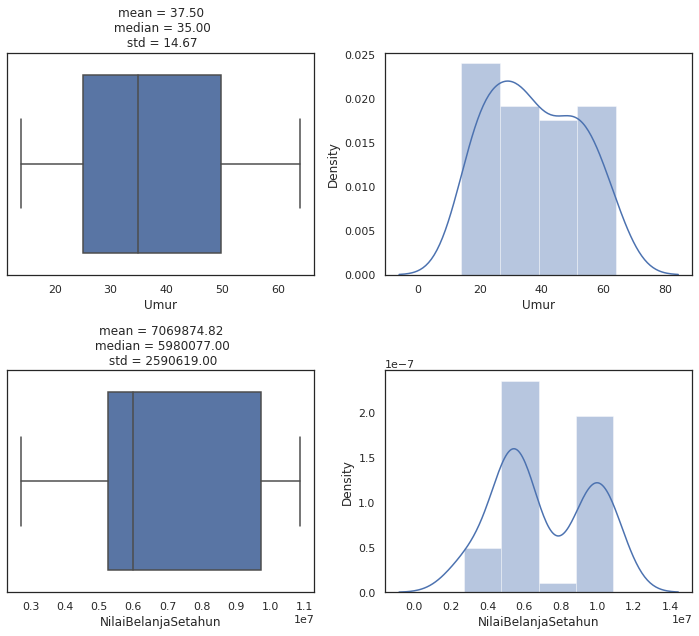

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
plt.clf()
  
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Umur','NilaiBelanjaSetahun'] 
observasi_num(kolom_numerik)

Dapat dilihat pada grafik boxplot diatas bahwa tidak ada data yang outlier baik dari data usia dan nilai belanja setahun. sehingga data numerikal dapat dilanjutkan proses analisisnya. 

# **Data** **Kategorikal** 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 432x288 with 0 Axes>

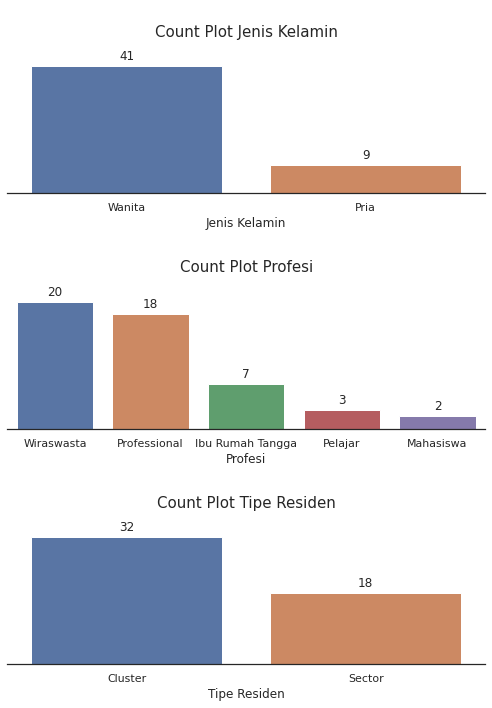

In [4]:
plt.clf()
  
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  

# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot
    sns.countplot(df[kol], order = df[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs[i])
    plt.tight_layout()

# Tampilkan plot
plt.show()

Diatas merupakan gambar grafik untuk jumlah masing-masing data kategorikal

# **4. PERSIAPAN PEMODELAN DATA**

Pada bagian persiapan model ini, langkah yang perlu dilakukan adalah dengan standarisasi data numerikal, konversi data kategorikal dengan label encoder, dan menggabungkan data yang sudah diolah sebelumnya. 

# **Standarisasi Data Numerikal**
Pada data numerikal sebelumnya, range dari kedua data masih berbeda, sehingga diperlukan standarisasi agar data-data dalam satu skala.  Tujuannya juga adalah agar variabel yang memiliki skala besar tidak mendominasi bagaimana cluster akan di bentuk dan juga tiap variabel akan di anggap sama pentingnya oleh algoritma yang akan di gunakan.

Dalam proses ini menggunakan library sklearn dan mengambil standardscaler 

In [5]:
from sklearn.preprocessing import StandardScaler  
  
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
# Statistik sebelum Standardisasi  
print('Statistik Sebelum Standardisasi\n')  
print(df[kolom_numerik].describe().round(1))  
  
# Standardisasi  
df_std = StandardScaler().fit_transform(df[kolom_numerik])  
  
# Membuat DataFrame  
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)  
  
# Menampilkan contoh isi data dan summary statistic  
print('Contoh hasil standardisasi\n')  
print(df_std.head())  
  
print('Statistik hasil standardisasi\n')  
print(df_std.describe().round(0))  


Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean    0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


# **Konversi** **Data** **Kategorikal** 

Selanjutnya  diperlukan merubah kolom-kolom yang berjenis kategorikal menjadi angka dengan menggunakan salah satu fungsi dari sklearn yaitu LabelEncoder. Pada dasarnya fungsi ini akan melakukan konversi data pelanggan dari teks menjadi numerik. Tujuan koversi agar memudahkan pemodelan data. 

Sebagai contoh untuk kolom Jenis Kelamin, teks "Pria" akan dirubah menjadi angka 0 dan teks "Wanita" akan di rubah menjadi angka satu. Perubahan ini perlu kita untuk semua teks sebelum di gunakan pada algoritma K-Prototype.

In [6]:
from sklearn.preprocessing import LabelEncoder
  
# Inisiasi nama kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
# Membuat salinan data frame  
df_encode = df[kolom_kategorikal].copy()  
  
  
# Melakukan labelEncoder untuk semua kolom kategorikal  
for col in kolom_kategorikal:  
   df_encode[col]= LabelEncoder().fit_transform(df_encode[col])
      
# Menampilkan data  
print(df_encode.head())


   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


# **Menggabungkan Data**

Setelah kedua data diubah, langkah selanjutanya adalah menggabungkan data dan dilanjutkan ke proses selanjutnya

In [7]:
# Menggabungkan data frame
df_model= df_encode.merge(df_std, left_index = True, right_index=True, how= 'left')  
print (df_model.head())


   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


# **5. PEMODELAN DATA CLUSTER**

Clustering adalah proses pembagian objek-objek ke dalam beberapa kelompok (cluster) berdasarkan tingkat kemiripan antara satu objek dengan yang lain.

Terdapat beberapa algoritma untuk melakukan clustering ini. Salah satu yang populer adalah k-means.

K-means itu sendiri biasa nya hanya digunakan untuk data-data yang bersifat numerik. Sedangkan untuk yang bersifat kategorikal saja, kita bisa menggunakan k-modes.

Jika terdapat gabungan kategorikal dan numerikal variabel maka bisa menggunakan algoritma k-prototype yang merupakan gabungan dari k-means dan k-modes. Hal ini bisa di lakukan dengan menggunakan library k-modes yang di dalamnya terdapat modul kprototype.

Sebelum itu, karena di collab belum memiliki library kmodes, maka dapat diinstall terlebih dahulu. 

In [8]:
!pip install kmodes

# **Mengetahui Jumlah Cluster yang Optimal** 

Sebelum data dimasukkan ke cluster, diperlukan jumlah cluster yang optimal, Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunakan bantuan 'elbow plot'.

Elbow plot ini dapat di buat dengan cara  memvisualisasikan total jarak seluruh data kita ke pusat cluster nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.

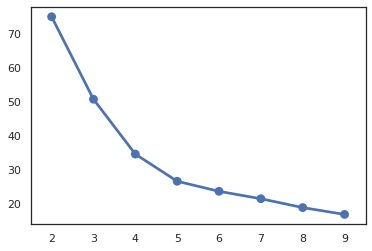

In [23]:
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  


# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes (n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost [k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

Dari hasil tersebut, dapat diketahui titik siku dari plot tersebut adalah pada saat k = 5. Sehingga diputuskan untuk menggunakan 5 sebagai jumlah cluster optimalnya.

# **Membuat** **Model** 
Selanjutnya dapat melakukan pembuatan model dengan jumlah kluster yang sudah di dapat pada tahap sebelumnya yaitu 5 dan menyimpan hasilnya sebagai pickle file. Model yang sudah  dibuat dapat di gunakan untuk menentukan setiap pelanggan masuk ke dalam cluster yang mana. 

Cluster yang dihasilkan dapat ditambahkan menjadi kolom, sehingga terlihat setiap customer masuk ke cluster apa saja. 

In [10]:
import pickle  
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
  
kproto = KPrototypes (n_clusters= 5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  
  
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb')) 

In [24]:
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')
kproto = KPrototypes(n_clusters=5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  

# Menentukan segmen tiap pelanggan    
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()    
df_final['cluster'] = clusters
print(df_final.head())

segmen pelanggan: [1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]

  Customer_ID       Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
0    CUST-001         Budi Anggara  ...             9497927        1
1    CUST-002     Shirley Ratuwati  ...             2722700        0
2    CUST-003         Agus Cahyono  ...             5286429        2
3    CUST-004     Antonius Winarta  ...             5204498        2
4    CUST-005  Ibu Sri Wahyuni, IR  ...            10615206        3

[5 rows x 8 columns]


Dapat dilihat pada data diatas bahwa terdapat kolom baru yang berisi cluster masing-masing customer berdasarkan algoritma KPrototypes.

Kemudian berikut ditampilkan data yang menampilkan cluster tiap pelanggan 

In [12]:
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,5):  
    print('\nPelanggan cluster: {}\n'.format(i))  
    print(df_final[df_final['cluster']== i ])


Pelanggan cluster: 0

   Customer_ID    Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
1     CUST-002  Shirley Ratuwati  ...             2722700        0
19    CUST-020    Irene Novianto  ...             2896845        0
30    CUST-031     Eviana Handry  ...             3042773        0
32    CUST-033   Cecilia Kusnadi  ...             3047926        0
39    CUST-040    Irene Darmawan  ...             2861855        0

[5 rows x 8 columns]

Pelanggan cluster: 1

   Customer_ID    Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
0     CUST-001      Budi Anggara  ...             9497927        1
6     CUST-007     Cahyono, Agus  ...             9837260        1
12    CUST-013      Cahaya Putri  ...             9333168        1
13    CUST-014    Mario Setiawan  ...             9471615        1
31    CUST-032   Chintya Winarni  ...            10663179        1
37    CUST-038      Agatha Salim  ...            10477127        1
47    CUST-048  Maria Hutagalung  ...            10390732    

# **Visualisasi** **Hasil** **Clustering** 

Berikut merupakan visualisasi untuk setiap cluster berdasarkan usia dan nilai belanja setahun. 

Untuk usia sendiri dapat dilihat bahwa untuk cluster 1 dan cluster 2 memiliki umur kisaran 50 keatas, sedangkan sisanya dibawah 50 keatas. Cluster 1 merupakan cluster dengan umur paling rendah diantara cluster lain 

Untuk nilai belanja setahun, cluster 1 dan cluster 3 memiliki nilai terbesar dari cluster lain. 

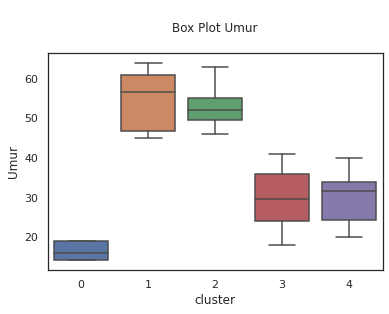

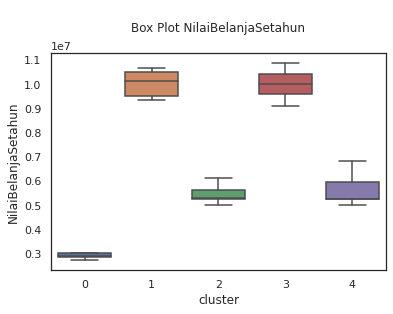

In [25]:
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']

for i in kolom_numerik:
	plt.figure(figsize=(6,4))
	ax = sns.boxplot(x = 'cluster',y = i, data = df_final)
	plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
	plt.show()


Kemudian berikut merupakan visualisasi berdasarkan data kategorikal.


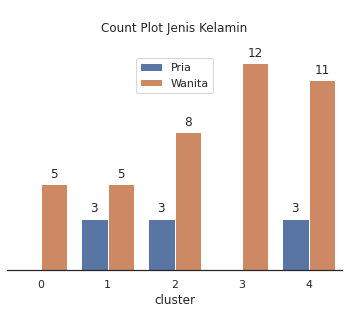

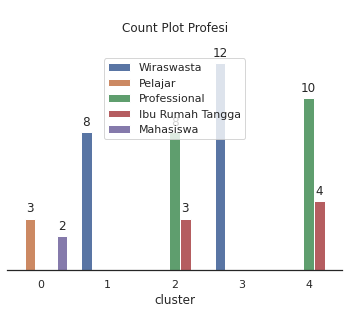

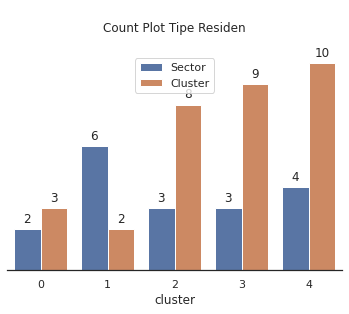

In [26]:
# Data Kategorikal  
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax. legend (loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  


# **Menamakan Cluster**

Dari hasil observasi yang dilakukan kemudian memberikan nama segmen dari tiap tiap nomor kluster nya. Yaitu:

**Cluster 0**: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.

**Cluster 1**: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswata yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.

**Cluster 2**: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.

**Cluster 3**: Gold Young Member, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahun nya mendekati 6 juta.

**Cluster 4**: Gold Senior Member, isi cluster ini adalah para professional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahun nya mendekati 6 juta.

# **6. PENGGUNAAN MODEL UNTUK DATA BARU**

Model yang sudah dibuat harus bisa di gunakan sehari hari untuk memprediksi data baru. Untuk itu kamu harus mempersiapkan datanya kembali dan kemudian melakukan prediksi dengan parameter dan model yang sudah di buat.

Pertama membuat suatu data frame yang berisi data baru.



In [102]:
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]
new_df = pd.DataFrame(data) 
new_df



,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000


# **Membuat Fungsi Data Pemrosesan**

Selanjutnya membuat fungsi untuk melakukan pemrosesan data berdasarkan paramater yang sama pada saat melakukan permodelan sebelumnya dan panggil dengan data baru yang dibuat.

Jadi fungsi ini nantinya akan bisa di gunakan untuk:

**1. Melakukan konversi data kategorikal menjadi numerik**

Dari proses sebelumnya kita tau representasi tiap kode dan maksudnya yaitu:

Jenis Kelamin

0 : Pria

1 : Wanita

Profesi

0 : Ibu Rumah Tangga

1 : Mahasiswa

2 : Pelajar

3 : Professional

4 : Wiraswasta

Tipe Residen

1 : Sector

0 : Cluster

Selanjutnya kita harus membuat fungsi untuk merubah data kategorikal menjadi numerik berdasarkan referensi tersebut.

**2. Melakukan standardisasi kolom numerikal**

Untuk melakukan standardisasi dengan variable yang sama pada saat permodelan kita perlu menggunakan nilai rata-rata dan standard deviasi dari tiap variabel pada saat kita melakukan permodelan. Yaitu:

**Umur**

Rata - rata: 37.5

Standard Deviasi: 14.7

**NilaiBelanjaSetahun**

Rata - rata: 7069874.8

Standard Deviasi: 2590619.0

Dari nilai-nilai tersebut kita dapat menghitung nilai standardisasi (z) dengan menggunakan rumus Z = (x - u)/s dengan x adalah tiap nilai, u adalah rata-rata dan s adalah standard deviasi.

Menggabungkan hasil dua proses sebelumnya menjadi satu data frame

Selanjutnya kamu perlu menggabungkan kedua perintah tersebut dan menjadi data frame yang siap untuk dilakukan permodelan.

In [20]:
def data_preprocess(data):  
    # Konversi Kategorikal data  
    kolom_kategorikal = ['Jenis Kelamin', 'Profesi', 'Tipe Residen']  
      
    df_encode = data[kolom_kategorikal].copy()  
  
    ## Jenis Kelamin   
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })  
      
    ## Profesi  
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })  
      
    ## Tipe Residen  
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
      
    # Standardisasi Numerical Data  
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardisasi Kolom Umur  
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7  
      
    ## Standardisasi Kolom Nilai Belanja Setahun  
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0  
      
    # Menggabungkan Kategorikal dan numerikal data  
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  
# Menjalankan fungsi  
new_df_model = data_preprocess(new_df)  
  
print(new_df_model)

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


# **Memanggil Model dan Melakukan Prediksi**

Setelah kamu memiliki data yang siap di gunakan, saatnya memanggil model yang sudah di simpan sebelumnya dan dilanjutkan dengan melakukan prediksi.

Untuk melakukan hal tersebut, kamu perlu membuat prosesnya menjadi dalam satu fungsi yang bernama modelling dengan menggunakan data baru sebagai input nya.

In [21]:
import pickle

def data_preprocess(data):
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']
    df_encode = data[kolom_kategorikal].copy()
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    }) 
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    }) 
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7 
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
    return df_model  
  
new_df_model = data_preprocess(new_df)

def modelling (data):  
      
    # Memanggil Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters= kpoto. predict (data,categorical=[0,1,2])  
      
    return clusters  
  
# Menjalankan Fungsi  
clusters = modelling(new_df_model)  
  
print(clusters)



[1]


# **Menamakan Segmen**

Sama dengan sebelumnya, kamu perlu membuat fungsi untuk melakukan proses ini. Nama cluster yang sudah didapat di tahap sebelumnya perlu di rubah menjadi nama segmen agar lebih mudah diidentifikasi.

In [22]:
def menamakan_segmen (data_asli, clusters):  
      
    # Menggabungkan cluster dan data asli  
    final_df = data_asli.copy()  
    final_df['cluster'] = clusters
      
    # Menamakan segmen  
    final_df['segmen'] = final_df['cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member',  
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return final_df
  
# Menjalankan Fungsi  
new_final_df = menamakan_segmen (new_df,clusters)  
  
print(new_final_df)  


  Customer_ID Nama Pelanggan  ... cluster                 segmen
0    CUST-100           Joko  ...       1  Diamond Senior Member

[1 rows x 9 columns]


# **7. CONTOH DATAFRAME**

Selanjutnya bisa dicoba menambah data di dataframe new_df kemudian menjalankan fungsi yang telah dibuat sebelumnya

In [103]:
new_df


,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000


In [104]:
data2 = [{  
    'Customer_ID': 'CUST-101' ,  
    'Nama Pelanggan': 'Rais' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 21,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8500000  
      
},
    {'Customer_ID': 'CUST-102' ,  
    'Nama Pelanggan': 'Nonon' ,  
    'Jenis Kelamin': 'Wanita',  
    'Umur': 59,  
    'Profesi': 'Professional',  
    'Tipe Residen': 'Sector' ,  
    'NilaiBelanjaSetahun': 10000000}]

new_df = new_df.append(data2, ignore_index=True) 
new_df

,Customer_ID,Nama Pelanggan,Jenis Kelamin,Umur,Profesi,Tipe Residen,NilaiBelanjaSetahun
0,CUST-100,Joko,Pria,45,Wiraswasta,Cluster,8230000
1,CUST-101,Rais,Pria,21,Wiraswasta,Cluster,8500000
2,CUST-102,Nonon,Wanita,59,Professional,Sector,10000000


In [106]:
new_df_model = data_preprocess(new_df)
new_df_model

,Jenis Kelamin,Profesi,Tipe Residen,Umur,NilaiBelanjaSetahun
0,0,4,0,0.510204,0.447818
1,0,4,0,-1.122449,0.552040
2,1,3,1,1.462585,1.131052


In [108]:
clusters = modelling(new_df_model)
clusters

array([1, 3, 1], dtype=uint16)

In [109]:
new_final_df = menamakan_segmen (new_df,clusters)  
  
print(new_final_df)  

  Customer_ID Nama Pelanggan  ... cluster                 segmen
0    CUST-100           Joko  ...       1  Diamond Senior Member
1    CUST-101           Rais  ...       3      Gold Young Member
2    CUST-102          Nonon  ...       1  Diamond Senior Member

[3 rows x 9 columns]
